In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\shrik\\OneDrive\\Desktop\\books\\Ecommerce Customers (2).csv")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


Independant features:

    1. Email
    2. Address
    3. Avatar
    4. Avg. Session Length
    4. Time on App
    5. Time on Website
    6. Length of Membership
    
Target Feature

    1. Yearly Amount Spent

In [3]:
df.shape

(500, 8)

There are 8 columns and 800 rows

In [4]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

No null values

In [5]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

Machine learning module only takes numerical values

1. Here there are 4 float columns and 3 object (string) columns
2. All object columns are descriptive but seems irrelavent for target feature.

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


By 1st glance all data looks fairly normally distributed

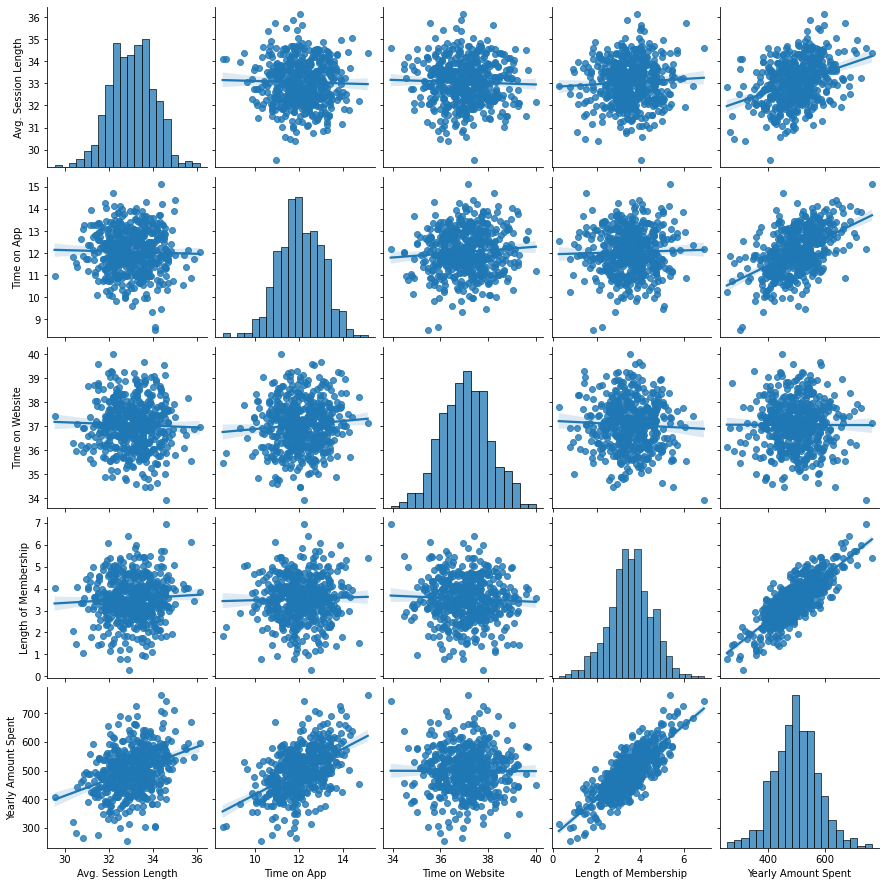

In [7]:
sns.pairplot(data=df,kind='reg')

Observations::


    1. Avg. Session Length has WEAK POSITIVE RELATION WITH target feature.
    2. Time on App has WEAK POSITIVE RELATION WITH target feature.
    3. Time on App is strongly related to target feature than Avg. Session Length.
    4. Time on Website has NO RELATION WITH target feature.
    5. Length of Membership has STRONG POSITIVE RELATION with target feature.

In [8]:
x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

# train_test_split


**from sklearn.model_selection import train_test_split**

    Splits data into train and test
    Returns
            X_train
            X_test
            y_train
            y_test
            
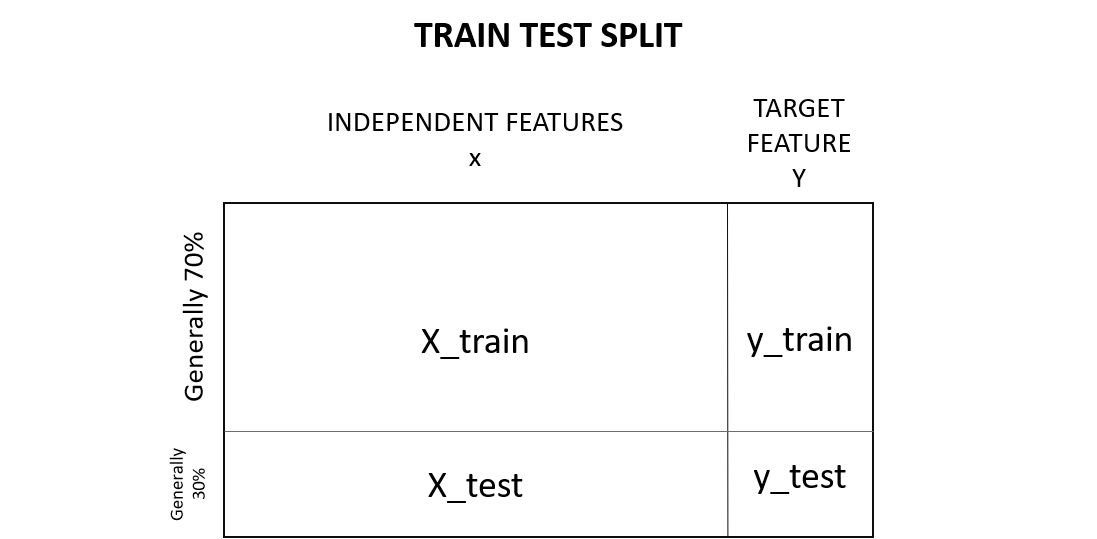

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Linear regression algorithm

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression() # Object of class (LinearRegression)
lr.fit(X_train,y_train) # Training the model

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

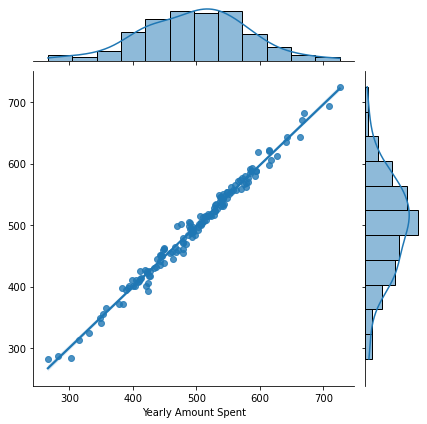

In [15]:
sns.jointplot(x = y_test, y = y_pred,kind='reg')

In [16]:
lr.score(X=X_test, y=y_test) # Accuracy of model

0.9863508820535836

# Changing x and y for relative comparison

0.08915167286529546


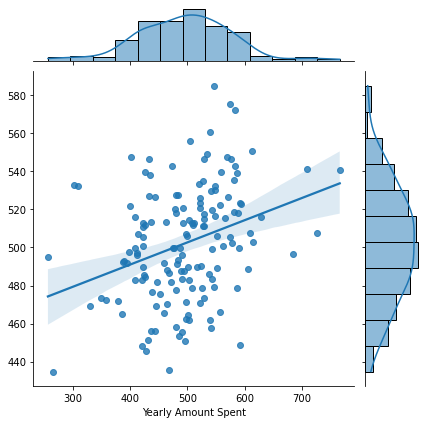

In [27]:
x1 = df['Avg. Session Length']
y1 = df['Yearly Amount Spent']

# from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)

### Linear regression algorithm

# from sklearn.linear_model import LinearRegression

lr1 = LinearRegression() # Object of class (LinearRegression)
lr1.fit(X_train1.values.reshape(-1,1),y_train1) # Training the model

y_pred1 = lr1.predict(X_test1.values.reshape(-1,1))

print(sns.jointplot(x = y_test1, y = y_pred1,kind='reg'))

print(lr1.score(X=X_test1.values.reshape(-1,1), y=y_test1)) # Accuracy of model

***as "Avg. Session Length" has WEAK POSITIVE RELATION WITH target feature acuuracy has drastically decreased (from 98.63% to 8.91%).***

0.27545788765230894


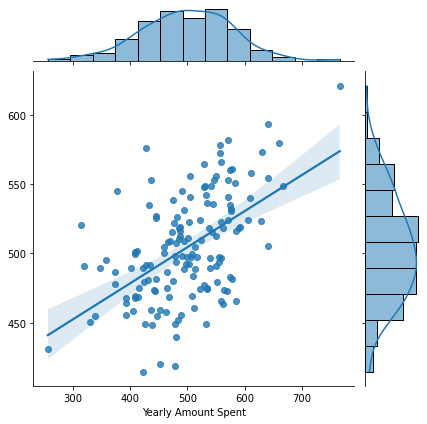

In [28]:
x2 = df['Time on App']
y2 = df['Yearly Amount Spent']

# from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3)

### Linear regression algorithm

# from sklearn.linear_model import LinearRegression

lr2 = LinearRegression() # Object of class (LinearRegression)
lr2.fit(X_train2.values.reshape(-1,1),y_train2) # Training the model

y_pred2 = lr2.predict(X_test2.values.reshape(-1,1))

print(sns.jointplot(x = y_test2, y = y_pred2,kind='reg'))

print(lr2.score(X=X_test2.values.reshape(-1,1), y=y_test2)) # Accuracy of model

***as "Time on App" has WEAK POSITIVE RELATION WITH target feature acuuracy has drastically decreased (from 98.63% to 27.54%). But it is better than "Avg. Session Length" which was 8.91%***

-0.003646179743584055


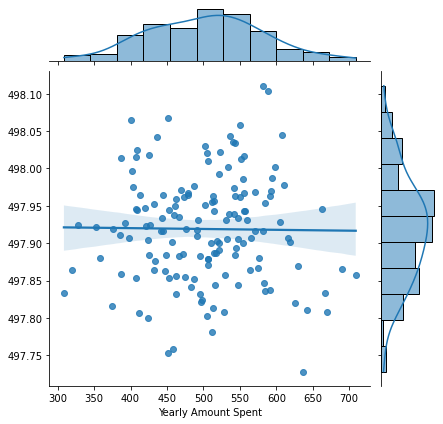

In [30]:
x3 = df['Time on Website']
y3 = df['Yearly Amount Spent']

# from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3)

### Linear regression algorithm

# from sklearn.linear_model import LinearRegression

lr3 = LinearRegression() # Object of class (LinearRegression)
lr3.fit(X_train3.values.reshape(-1,1), y_train3) # Training the model

y_pred3 = lr3.predict(X_test3.values.reshape(-1,1))

print(sns.jointplot(x = y_test3, y = y_pred3,kind='reg'))

print(lr3.score(X=X_test3.values.reshape(-1,1), y=y_test3)) # Accuracy of model

***as "Time on Website" has NO RELATION WITH target feature acuuracy has drastically decreased (from 98.63% to -0.36%).***

***Model is totally useless***

0.6683564136889429


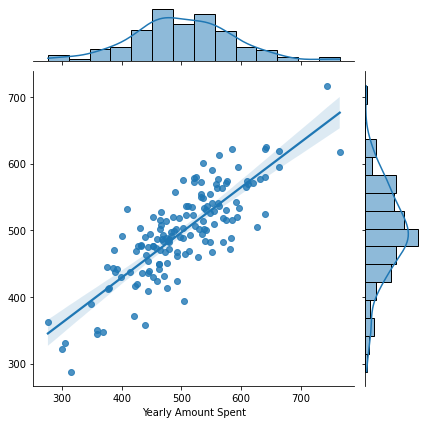

In [31]:
x4 = df['Length of Membership']
y4 = df['Yearly Amount Spent']

# from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.3)

### Linear regression algorithm

# from sklearn.linear_model import LinearRegression

lr4 = LinearRegression() # Object of class (LinearRegression)
lr4.fit(X_train4.values.reshape(-1,1), y_train4) # Training the model

y_pred4 = lr4.predict(X_test4.values.reshape(-1,1))

print(sns.jointplot(x = y_test4, y = y_pred4, kind='reg'))

print(lr4.score(X=X_test4.values.reshape(-1,1), y=y_test4)) # Accuracy of model

***as "Length of Membership" has STRONG POSITIVE RELATION with target feature acuuracy has decreased (from 98.63% to 66.83%). But not that much***

***Model is ideal***